In [1]:
import numpy as np
import os

# ‡∏Å‡∏≥‡∏´‡∏ô‡∏î‡∏ä‡∏∑‡πà‡∏≠‡πÑ‡∏ü‡∏•‡πå .npz ‡∏ó‡∏µ‡πà‡∏Ñ‡∏∏‡∏ì‡∏ö‡∏±‡∏ô‡∏ó‡∏∂‡∏Å‡πÑ‡∏ß‡πâ
# ‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡πÉ‡∏´‡πâ‡πÅ‡∏ô‡πà‡πÉ‡∏à‡∏ß‡πà‡∏≤‡πÑ‡∏ü‡∏•‡πå‡∏ô‡∏µ‡πâ‡∏≠‡∏¢‡∏π‡πà‡πÉ‡∏ô‡πÇ‡∏ü‡∏•‡πÄ‡∏î‡∏≠‡∏£‡πå BASE_OUTPUT_PATH ‡∏´‡∏£‡∏∑‡∏≠‡∏£‡∏∞‡∏ö‡∏∏ path ‡∏ó‡∏µ‡πà‡∏ñ‡∏π‡∏Å‡∏ï‡πâ‡∏≠‡∏á
NPZ_FILE_PATH = '/kaggle/input/landmarks-with-label/all_data_with_landmarks1.npz'

def load_and_prepare_data(npz_file_path):
    """
    Loads the .npz file and prepares the data into X_train, y_train, etc.

    Args:
        npz_file_path (str): Path to the .npz file containing the processed data.

    Returns:
        tuple: A tuple containing (X_train, y_train, X_val, y_val, X_test, y_test,
                                   train_filenames, val_filenames, test_filenames)
               X will be a dictionary containing 'landmarks', 'landmark_indices', 'connections'.
               y will be a numpy array of labels.
               filenames will be a numpy array of filenames.
               Returns (None, ...) if the file is not found.
    """
    if not os.path.exists(npz_file_path):
        print(f"Error: File not found at {npz_file_path}")
        return None, None, None, None, None, None, None, None, None

    # ‡πÇ‡∏´‡∏•‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏à‡∏≤‡∏Å‡πÑ‡∏ü‡∏•‡πå .npz
    data = np.load(npz_file_path, allow_pickle=True) # allow_pickle=True ‡πÄ‡∏ô‡∏∑‡πà‡∏≠‡∏á‡∏à‡∏≤‡∏Å‡πÄ‡∏£‡∏≤‡πÄ‡∏Å‡πá‡∏ö array of objects

    all_landmarks = data['landmarks']
    all_landmark_indices = data['landmark_indices']
    all_connections = data['connections']
    all_labels = data['labels']
    all_splits = data['splits']
    all_filenames = data['filenames']

    # Initialize lists to hold data for each split
    X_train_landmarks, X_train_indices, X_train_connections, y_train, train_filenames = [], [], [], [], []
    X_val_landmarks, X_val_indices, X_val_connections, y_val, val_filenames = [], [], [], [], []
    X_test_landmarks, X_test_indices, X_test_connections, y_test, test_filenames = [], [], [], [], []

    print("‡∏Å‡∏≥‡∏•‡∏±‡∏á‡πÅ‡∏¢‡∏Å‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ï‡∏≤‡∏° split ‡πÅ‡∏•‡∏∞‡πÄ‡∏ï‡∏£‡∏µ‡∏¢‡∏° X, y...")
    for i in range(len(all_splits)):
        current_split = all_splits[i].lower()
        
        # Determine which list to append to
        if current_split == 'train':
            X_landmarks_list, X_indices_list, X_connections_list, y_list, filenames_list = \
                X_train_landmarks, X_train_indices, X_train_connections, y_train, train_filenames
        elif current_split == 'valid':
            X_landmarks_list, X_indices_list, X_connections_list, y_list, filenames_list = \
                X_val_landmarks, X_val_indices, X_val_connections, y_val, val_filenames
        elif current_split == 'test':
            X_landmarks_list, X_indices_list, X_connections_list, y_list, filenames_list = \
                X_test_landmarks, X_test_indices, X_test_connections, y_test, test_filenames
        else:
            print(f"‡∏Ñ‡∏≥‡πÄ‡∏ï‡∏∑‡∏≠‡∏ô: ‡πÑ‡∏°‡πà‡∏£‡∏π‡πâ‡∏à‡∏±‡∏Å split type '{all_splits[i]}' ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡πÑ‡∏ü‡∏•‡πå '{all_filenames[i]}'. ‡∏Ç‡πâ‡∏≤‡∏°‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ô‡∏µ‡πâ.")
            continue # ‡∏Ç‡πâ‡∏≤‡∏°‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ó‡∏µ‡πà‡πÑ‡∏°‡πà‡∏£‡∏π‡πâ‡∏à‡∏±‡∏Å split

        # Append data to the respective lists
        X_landmarks_list.append(all_landmarks[i])
        X_indices_list.append(all_landmark_indices[i])
        X_connections_list.append(all_connections[i])
        y_list.append(all_labels[i])
        filenames_list.append(all_filenames[i])

    # Convert lists to NumPy arrays
    # X variables are dictionaries, so combine their lists into dictionaries of arrays
    X_train = {
        'landmarks': np.array(X_train_landmarks, dtype=object),
        'connections': np.array(X_train_connections, dtype=object)
    }
    y_train = np.array(y_train)
    train_filenames = np.array(train_filenames)

    X_val = {
        'landmarks': np.array(X_val_landmarks, dtype=object),
        'connections': np.array(X_val_connections, dtype=object)
    }
    y_val = np.array(y_val)
    val_filenames = np.array(val_filenames)

    X_test = {
        'landmarks': np.array(X_test_landmarks, dtype=object),
        'connections': np.array(X_test_connections, dtype=object)
    }
    y_test = np.array(y_test)
    test_filenames = np.array(test_filenames)


    print("‡∏Å‡∏≤‡∏£‡πÄ‡∏ï‡∏£‡∏µ‡∏¢‡∏°‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏• X, y ‡πÅ‡∏•‡∏∞‡πÅ‡∏¢‡∏Å split ‡πÄ‡∏™‡∏£‡πá‡∏à‡∏™‡∏°‡∏ö‡∏π‡∏£‡∏ì‡πå")
    print(f"Train Set Size: {len(y_train)}")
    print(f"Validation Set Size: {len(y_val)}")
    print(f"Test Set Size: {len(y_test)}")

    return X_train, y_train, X_val, y_val, X_test, y_test, \
           train_filenames, val_filenames, test_filenames

if __name__ == '__main__':
    X_train, y_train, X_val, y_val, X_test, y_test, \
    train_filenames, val_filenames, test_filenames = load_and_prepare_data(NPZ_FILE_PATH)

    if X_train is not None:
        print("\n--- ‡∏ï‡∏±‡∏ß‡∏≠‡∏¢‡πà‡∏≤‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ó‡∏µ‡πà‡∏ñ‡∏π‡∏Å‡πÅ‡∏¢‡∏Å‡πÅ‡∏•‡πâ‡∏ß ---")
        print("X_train (landmarks) ‡∏£‡∏π‡∏õ‡∏£‡πà‡∏≤‡∏á:", X_train['landmarks'].shape)
        print("y_train (labels) ‡∏£‡∏π‡∏õ‡∏£‡πà‡∏≤‡∏á:", y_train.shape)
        print("y_train ‡∏ï‡∏±‡∏ß‡∏≠‡∏¢‡πà‡∏≤‡∏á:", y_train[:5])
        print("filenames ‡∏Ç‡∏≠‡∏á Train Set ‡∏ï‡∏±‡∏ß‡∏≠‡∏¢‡πà‡∏≤‡∏á:", train_filenames[:5])


        print("\nX_val (landmarks) ‡∏£‡∏π‡∏õ‡∏£‡πà‡∏≤‡∏á:", X_val['landmarks'].shape)
        print("y_val (labels) ‡∏£‡∏π‡∏õ‡∏£‡πà‡∏≤‡∏á:", y_val.shape)
        print("y_val ‡∏ï‡∏±‡∏ß‡∏≠‡∏¢‡πà‡∏≤‡∏á:", y_val[:5])

        print("\nX_test (landmarks) ‡∏£‡∏π‡∏õ‡∏£‡πà‡∏≤‡∏á:", X_test['landmarks'].shape)
        print("y_test (labels) ‡∏£‡∏π‡∏õ‡∏£‡πà‡∏≤‡∏á:", y_test.shape)
        print("y_test ‡∏ï‡∏±‡∏ß‡∏≠‡∏¢‡πà‡∏≤‡∏á:", y_test[:5])

        # ‡∏ï‡∏±‡∏ß‡∏≠‡∏¢‡πà‡∏≤‡∏á‡∏Å‡∏≤‡∏£‡πÄ‡∏Ç‡πâ‡∏≤‡∏ñ‡∏∂‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏Ç‡∏≠‡∏á‡∏£‡∏π‡∏õ‡πÅ‡∏£‡∏Å‡πÉ‡∏ô X_train
        print("\nLandmarks ‡∏Ç‡∏≠‡∏á‡∏£‡∏π‡∏õ‡πÅ‡∏£‡∏Å‡πÉ‡∏ô X_train:", X_train['landmarks'].shape)
        print("Connections ‡∏Ç‡∏≠‡∏á‡∏£‡∏π‡∏õ‡πÅ‡∏£‡∏Å‡πÉ‡∏ô X_train:", X_train['connections'].shape)

        # ‡∏Ñ‡∏∏‡∏ì‡∏™‡∏≤‡∏°‡∏≤‡∏£‡∏ñ‡πÉ‡∏ä‡πâ X_train, y_train ‡πÉ‡∏ô‡∏Å‡∏≤‡∏£‡∏ù‡∏∂‡∏Å‡πÇ‡∏°‡πÄ‡∏î‡∏•‡πÑ‡∏î‡πâ‡πÄ‡∏•‡∏¢
        # ‡πÅ‡∏•‡∏∞‡πÉ‡∏ä‡πâ X_val, y_val ‡πÉ‡∏ô‡∏Å‡∏≤‡∏£‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡∏õ‡∏£‡∏∞‡∏™‡∏¥‡∏ó‡∏ò‡∏¥‡∏†‡∏≤‡∏û‡∏£‡∏∞‡∏´‡∏ß‡πà‡∏≤‡∏á‡∏Å‡∏≤‡∏£‡∏ù‡∏∂‡∏Å‡πÅ‡∏•‡∏∞‡∏õ‡∏£‡∏±‡∏ö‡πÅ‡∏ï‡πà‡∏á‡πÇ‡∏°‡πÄ‡∏î‡∏•
        # ‡πÉ‡∏ä‡πâ X_test, y_test ‡πÉ‡∏ô‡∏Å‡∏≤‡∏£‡∏õ‡∏£‡∏∞‡πÄ‡∏°‡∏¥‡∏ô‡∏õ‡∏£‡∏∞‡∏™‡∏¥‡∏ó‡∏ò‡∏¥‡∏†‡∏≤‡∏û‡∏Ç‡∏±‡πâ‡∏ô‡∏™‡∏∏‡∏î‡∏ó‡πâ‡∏≤‡∏¢‡∏Ç‡∏≠‡∏á‡πÇ‡∏°‡πÄ‡∏î‡∏•

‡∏Å‡∏≥‡∏•‡∏±‡∏á‡πÅ‡∏¢‡∏Å‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ï‡∏≤‡∏° split ‡πÅ‡∏•‡∏∞‡πÄ‡∏ï‡∏£‡∏µ‡∏¢‡∏° X, y...
‡∏Å‡∏≤‡∏£‡πÄ‡∏ï‡∏£‡∏µ‡∏¢‡∏°‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏• X, y ‡πÅ‡∏•‡∏∞‡πÅ‡∏¢‡∏Å split ‡πÄ‡∏™‡∏£‡πá‡∏à‡∏™‡∏°‡∏ö‡∏π‡∏£‡∏ì‡πå
Train Set Size: 22645
Validation Set Size: 2803
Test Set Size: 2852

--- ‡∏ï‡∏±‡∏ß‡∏≠‡∏¢‡πà‡∏≤‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ó‡∏µ‡πà‡∏ñ‡∏π‡∏Å‡πÅ‡∏¢‡∏Å‡πÅ‡∏•‡πâ‡∏ß ---
X_train (landmarks) ‡∏£‡∏π‡∏õ‡∏£‡πà‡∏≤‡∏á: (22645, 92, 3)
y_train (labels) ‡∏£‡∏π‡∏õ‡∏£‡πà‡∏≤‡∏á: (22645,)
y_train ‡∏ï‡∏±‡∏ß‡∏≠‡∏¢‡πà‡∏≤‡∏á: ['neutral' 'neutral' 'neutral' 'neutral' 'sadness']
filenames ‡∏Ç‡∏≠‡∏á Train Set ‡∏ï‡∏±‡∏ß‡∏≠‡∏¢‡πà‡∏≤‡∏á: ['fer0000000.png' 'fer0000001.png' 'fer0000002.png' 'fer0000004.png'
 'fer0000006.png']

X_val (landmarks) ‡∏£‡∏π‡∏õ‡∏£‡πà‡∏≤‡∏á: (2803, 92, 3)
y_val (labels) ‡∏£‡∏π‡∏õ‡∏£‡πà‡∏≤‡∏á: (2803,)
y_val ‡∏ï‡∏±‡∏ß‡∏≠‡∏¢‡πà‡∏≤‡∏á: ['neutral' 'happiness' 'happiness' 'neutral' 'neutral']

X_test (landmarks) ‡∏£‡∏π‡∏õ‡∏£‡πà‡∏≤‡∏á: (2852, 92, 3)
y_test (labels) ‡∏£‡∏π‡∏õ‡∏£‡πà‡∏≤‡∏á: (2852,)
y_t

In [2]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

# --- ‡∏™‡πà‡∏ß‡∏ô‡∏ó‡∏µ‡πà‡πÅ‡∏Å‡πâ‡πÑ‡∏Ç ---
# 1. Flatten Landmarks

# ‡πÅ‡∏õ‡∏•‡∏á‡πÅ‡∏ï‡πà‡∏•‡∏∞ sample ‡πÉ‡∏´‡πâ‡πÄ‡∏õ‡πá‡∏ô numpy array ‡∏Å‡πà‡∏≠‡∏ô ‡πÅ‡∏•‡πâ‡∏ß‡∏à‡∏∂‡∏á reshape
# ‡∏ó‡∏≥‡πÅ‡∏¢‡∏Å 2 input
X_train_landmarks_flattened = [np.array(sample, dtype=np.float32).reshape(len(sample), -1) for sample in X_train['landmarks']]
X_test_landmarks_flattened = [np.array(sample, dtype=np.float32).reshape(len(sample), -1) for sample in X_test['landmarks']]
X_val_landmarks_flattened = [np.array(sample, dtype=np.float32).reshape(len(sample), -1) for sample in X_val['landmarks']]
X_train_connections_flattened = [np.array(sample, dtype=np.float32).reshape(len(sample), -1) for sample in X_train['connections']]
X_test_connections_flattened = [np.array(sample, dtype=np.float32).reshape(len(sample), -1) for sample in X_test['connections']]
X_val_connections_flattened = [np.array(sample, dtype=np.float32).reshape(len(sample), -1) for sample in X_val['connections']]

# ‡∏£‡∏ß‡∏° input
# def flatten_and_combine(data_dict):
#     combined_flattened_data = []
#     num_samples = len(data_dict['landmarks']) # ‡πÉ‡∏ä‡πâ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô sample ‡∏à‡∏≤‡∏Å landmarks (‡∏´‡∏£‡∏∑‡∏≠ connections ‡∏Å‡πá‡πÑ‡∏î‡πâ ‡πÄ‡∏û‡∏£‡∏≤‡∏∞‡πÄ‡∏ó‡πà‡∏≤‡∏Å‡∏±‡∏ô)

#     for i in range(num_samples):
#         # Flatten landmarks to 1D
#         landmark_flat = np.array(data_dict['landmarks'][i], dtype=np.float32).flatten()
        
#         # Flatten connections to 1D
#         connection_flat = np.array(data_dict['connections'][i], dtype=np.float32).flatten()
        
#         # Concatenate the 1D arrays
#         # ‡πÄ‡∏ô‡∏∑‡πà‡∏≠‡∏á‡∏à‡∏≤‡∏Å‡πÄ‡∏õ‡πá‡∏ô 1D array ‡∏≠‡∏¢‡∏π‡πà‡πÅ‡∏•‡πâ‡∏ß ‡∏Å‡∏≤‡∏£ concatenate ‡∏à‡∏∞‡∏ï‡πà‡∏≠‡∏Å‡∏±‡∏ô‡πÑ‡∏õ‡πÄ‡∏•‡∏¢
#         combined_data_for_sample = np.concatenate((landmark_flat, connection_flat))
        
#         combined_flattened_data.append(combined_data_for_sample)
    
#     return combined_flattened_data

# print("‡∏Å‡∏≥‡∏•‡∏±‡∏á Flatten ‡πÅ‡∏•‡∏∞‡∏£‡∏ß‡∏°‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏• 'landmarks' ‡πÅ‡∏•‡∏∞ 'connections'...")

# X_train_flattened = flatten_and_combine(X_train)
# X_test_flattened = flatten_and_combine(X_test)
# X_val_flattened = flatten_and_combine(X_val)

# print("Flatten ‡πÅ‡∏•‡∏∞‡∏£‡∏ß‡∏°‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡πÄ‡∏™‡∏£‡πá‡∏à‡∏™‡∏°‡∏ö‡∏π‡∏£‡∏ì‡πå")


# 2. Padding (‡∏™‡πà‡∏ß‡∏ô‡∏ô‡∏µ‡πâ‡∏°‡∏±‡∏Å‡∏à‡∏∞‡∏ñ‡∏π‡∏Å‡∏ï‡πâ‡∏≠‡∏á‡∏≠‡∏¢‡∏π‡πà‡πÅ‡∏•‡πâ‡∏ß)
print("‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏ó‡∏≥‡∏Å‡∏≤‡∏£ Padding ‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•...")
# ‡πÅ‡∏¢‡∏Å input
X_train_landmarks_padded = pad_sequences(X_train_landmarks_flattened, padding='post', dtype='float32')
X_test_landmarks_padded = pad_sequences(X_test_landmarks_flattened, padding='post', dtype='float32')
X_val_landmarks_padded = pad_sequences(X_val_landmarks_flattened, padding='post', dtype='float32')
X_train_connections_padded = pad_sequences(X_train_connections_flattened, padding='post', dtype='float32')
X_test_connections_padded = pad_sequences(X_test_connections_flattened, padding='post', dtype='float32')
X_val_connections_padded = pad_sequences(X_val_connections_flattened, padding='post', dtype='float32')

# ‡∏£‡∏ß‡∏° input
# X_train_padded = pad_sequences(X_train_flattened, padding='post', dtype='float32')
# X_test_padded = pad_sequences(X_test_flattened, padding='post', dtype='float32')
# X_val_padded = pad_sequences(X_val_flattened, padding='post', dtype='float32')
print("Padding ‡πÄ‡∏™‡∏£‡πá‡∏à‡∏™‡∏°‡∏ö‡∏π‡∏£‡∏ì‡πå")

# encoding
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_train = label_encoder.transform(y_train)
y_val = label_encoder.transform(y_val)
y_test = label_encoder.transform(y_test)
print("\n--- ‡∏´‡∏•‡∏±‡∏á‡∏ó‡∏≥ Label Encoding ---")
print("Mapping ‡∏Ç‡∏≠‡∏á Label Encoder:", list(label_encoder.classes_), "->", list(range(len(label_encoder.classes_))))
print("y_train_encoded:", y_train)
print("y_val_encoded:", y_val)
print("y_test_encoded:", y_test)

# ‡πÅ‡∏Å‡πâ‡πÑ‡∏Ç‡πÉ‡∏´‡πâ‡πÄ‡∏õ‡πá‡∏ô 3 ‡∏°‡∏¥‡∏ï‡∏¥
# X_train_landmarks_padded = np.expand_dims(X_train_landmarks_padded, axis=-1)
# X_test_landmarks_padded = np.expand_dims(X_test_landmarks_padded, axis=-1)
# X_val_landmarks_padded = np.expand_dims(X_val_landmarks_padded, axis=-1)
# X_train_connections_padded = np.expand_dims(X_train_connections_padded, axis=-1)
# X_test_connections_padded = np.expand_dims(X_test_connections_padded, axis=-1)
# X_val_connections_padded = np.expand_dims(X_val_connections_padded, axis=-1)

# X_train_padded = np.expand_dims(X_train_padded, axis=-1)
# X_test_padded = np.expand_dims(X_test_padded, axis=-1)
# X_val_padded = np.expand_dims(X_val_padded, axis=-1)

# ‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡∏£‡∏π‡∏õ‡∏£‡πà‡∏≤‡∏á‡∏Ç‡∏≠‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏´‡∏•‡∏±‡∏á Padding ‡πÄ‡∏û‡∏∑‡πà‡∏≠‡∏¢‡∏∑‡∏ô‡∏¢‡∏±‡∏ô
print("\n‡∏£‡∏π‡∏õ‡∏£‡πà‡∏≤‡∏á‡∏Ç‡∏≠‡∏á X_train_padded:", X_train_landmarks_padded.shape)
print("‡∏£‡∏π‡∏õ‡∏£‡πà‡∏≤‡∏á‡∏Ç‡∏≠‡∏á X_test_padded:", X_test_landmarks_padded.shape)
print("‡∏£‡∏π‡∏õ‡∏£‡πà‡∏≤‡∏á‡∏Ç‡∏≠‡∏á X_val_padded:", X_val_landmarks_padded.shape)
print("\n‡∏£‡∏π‡∏õ‡∏£‡πà‡∏≤‡∏á‡∏Ç‡∏≠‡∏á X_train_padded:", X_train_connections_padded.shape)
print("‡∏£‡∏π‡∏õ‡∏£‡πà‡∏≤‡∏á‡∏Ç‡∏≠‡∏á X_test_padded:", X_test_connections_padded.shape)
print("‡∏£‡∏π‡∏õ‡∏£‡πà‡∏≤‡∏á‡∏Ç‡∏≠‡∏á X_val_padded:", X_val_connections_padded.shape)
# print("\n‡∏£‡∏π‡∏õ‡∏£‡πà‡∏≤‡∏á‡∏Ç‡∏≠‡∏á X_train_padded:", X_train_padded.shape)
# print("‡∏£‡∏π‡∏õ‡∏£‡πà‡∏≤‡∏á‡∏Ç‡∏≠‡∏á X_test_padded:", X_test_padded.shape)
# print("‡∏£‡∏π‡∏õ‡∏£‡πà‡∏≤‡∏á‡∏Ç‡∏≠‡∏á X_val_padded:", X_val_padded.shape)

2025-07-13 07:40:55.440845: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752392455.778203      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752392455.886483      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


‡∏Å‡∏≥‡∏•‡∏±‡∏á‡∏ó‡∏≥‡∏Å‡∏≤‡∏£ Padding ‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•...
Padding ‡πÄ‡∏™‡∏£‡πá‡∏à‡∏™‡∏°‡∏ö‡∏π‡∏£‡∏ì‡πå

--- ‡∏´‡∏•‡∏±‡∏á‡∏ó‡∏≥ Label Encoding ---
Mapping ‡∏Ç‡∏≠‡∏á Label Encoder: ['anger', 'disgust', 'fear', 'happiness', 'neutral', 'sadness', 'surprise'] -> [0, 1, 2, 3, 4, 5, 6]
y_train_encoded: [4 4 4 ... 0 4 4]
y_val_encoded: [4 3 3 ... 3 4 4]
y_test_encoded: [5 4 6 ... 4 3 5]

‡∏£‡∏π‡∏õ‡∏£‡πà‡∏≤‡∏á‡∏Ç‡∏≠‡∏á X_train_padded: (22645, 92, 3)
‡∏£‡∏π‡∏õ‡∏£‡πà‡∏≤‡∏á‡∏Ç‡∏≠‡∏á X_test_padded: (2852, 92, 3)
‡∏£‡∏π‡∏õ‡∏£‡πà‡∏≤‡∏á‡∏Ç‡∏≠‡∏á X_val_padded: (2803, 92, 3)

‡∏£‡∏π‡∏õ‡∏£‡πà‡∏≤‡∏á‡∏Ç‡∏≠‡∏á X_train_padded: (22645, 160, 6)
‡∏£‡∏π‡∏õ‡∏£‡πà‡∏≤‡∏á‡∏Ç‡∏≠‡∏á X_test_padded: (2852, 160, 6)
‡∏£‡∏π‡∏õ‡∏£‡πà‡∏≤‡∏á‡∏Ç‡∏≠‡∏á X_val_padded: (2803, 160, 6)


In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense, Concatenate, BatchNormalization, Dropout, Flatten, Bidirectional
# --- Input ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö Landmarks ---
# input_shape ‡∏ï‡πâ‡∏≠‡∏á‡πÄ‡∏õ‡πá‡∏ô (timesteps, features)
num_classes = len(np.unique(y_train))

landmarks_input = Input(shape=(X_train_landmarks_padded.shape[1], X_train_landmarks_padded.shape[2]), name='landmarks_input')
x_landmarks_train = Bidirectional(LSTM(units=128, return_sequences=True))(landmarks_input)
x_landmarks_train = BatchNormalization()(x_landmarks_train)
x_landmarks_train = Dropout(0.2)(x_landmarks_train)
x_landmarks_train = Bidirectional(LSTM(units=64))(x_landmarks_train) # ‡∏ä‡∏±‡πâ‡∏ô‡∏™‡∏∏‡∏î‡∏ó‡πâ‡∏≤‡∏¢‡πÑ‡∏°‡πà‡∏ï‡πâ‡∏≠‡∏á return_sequences=True
x_landmarks_train = BatchNormalization()(x_landmarks_train)
x_landmarks_train = Dropout(0.2)(x_landmarks_train)

# --- Input ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö Connections ---
connections_input = Input(shape=(X_train_connections_padded.shape[1], X_train_connections_padded.shape[2]), name='connections_input')
x_connections_train = Bidirectional(LSTM(units=128, return_sequences=True))(connections_input)
x_connections_train = BatchNormalization()(x_connections_train)
x_connections_train = Dropout(0.2)(x_connections_train)
x_connections_train = Bidirectional(LSTM(units=64))(x_connections_train) # ‡∏ä‡∏±‡πâ‡∏ô‡∏™‡∏∏‡∏î‡∏ó‡πâ‡∏≤‡∏¢‡πÑ‡∏°‡πà‡∏ï‡πâ‡∏≠‡∏á return_sequences=True
x_connections_train = BatchNormalization()(x_connections_train)
x_connections_train = Dropout(0.2)(x_connections_train)

# --- ‡∏£‡∏ß‡∏° Output ‡∏à‡∏≤‡∏Å‡∏ó‡∏±‡πâ‡∏á‡∏™‡∏≠‡∏á‡∏™‡πà‡∏ß‡∏ô‡πÄ‡∏Ç‡πâ‡∏≤‡∏î‡πâ‡∏ß‡∏¢‡∏Å‡∏±‡∏ô ---
# ‡∏Ñ‡∏∏‡∏ì‡∏≠‡∏≤‡∏à‡∏ï‡πâ‡∏≠‡∏á Flatten ‡∏ú‡∏•‡∏•‡∏±‡∏û‡∏ò‡πå‡∏Ç‡∏≠‡∏á LSTM ‡∏Å‡πà‡∏≠‡∏ô Concatenate ‡∏´‡∏≤‡∏Å‡∏ï‡πâ‡∏≠‡∏á‡∏Å‡∏≤‡∏£‡∏ï‡πà‡∏≠‡πÉ‡∏ô‡∏°‡∏¥‡∏ï‡∏¥ features
# ‡∏´‡∏£‡∏∑‡∏≠‡πÉ‡∏ä‡πâ GlobalAveragePooling1D/GlobalMaxPooling1D ‡∏´‡∏≤‡∏Å‡∏ï‡πâ‡∏≠‡∏á‡∏Å‡∏≤‡∏£‡∏•‡∏î‡∏°‡∏¥‡∏ï‡∏¥
combined_features = Concatenate()([x_landmarks_train, x_connections_train]) # ‡∏ï‡πà‡∏≠‡∏ú‡∏•‡∏•‡∏±‡∏û‡∏ò‡πå‡∏Ç‡∏≠‡∏á LSTM

# --- Output Layer ---
combined_features = Dense(64, activation='relu')(combined_features)
combined_features = BatchNormalization()(combined_features)
combined_features = Dropout(0.2)(combined_features)
output = Dense(num_classes, activation='softmax')(combined_features)

I0000 00:00:1752392478.171303      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1752392478.172004      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [4]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Input, Dropout, BatchNormalization, Bidirectional

# # ‡∏´‡∏≤‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏Ñ‡∏•‡∏≤‡∏™‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î
# num_classes = len(np.unique(y_train))
# # ‡∏´‡∏≤‡∏£‡∏π‡∏õ‡∏£‡πà‡∏≤‡∏á‡∏Ç‡∏≠‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏• Input
# sequence_length = X_train_padded.shape[1] # ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏¢‡∏≤‡∏ß‡∏Ç‡∏≠‡∏á‡∏ã‡∏µ‡πÄ‡∏Ñ‡∏ß‡∏ô‡∏ã‡πå‡∏´‡∏•‡∏±‡∏á padding
# num_features = X_train_padded.shape[2]    # ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô features ‡∏´‡∏•‡∏±‡∏á flatten

# model = Sequential()

# #1st layer
# model.add(Bidirectional(LSTM(units=256, return_sequences=True, input_shape=(sequence_length, num_features))))
# model.add(BatchNormalization())
# model.add(Dropout(0.2))

# #2nd layer
# model.add(Bidirectional(LSTM(units=128, return_sequences=True)))
# model.add(BatchNormalization())
# model.add(Dropout(0.2))

# #3rd layer
# model.add(Bidirectional(LSTM(units=128, return_sequences=True)))
# model.add(BatchNormalization())
# model.add(Dropout(0.2))

# #4th layer
# model.add(Bidirectional(LSTM(units=64)))
# model.add(BatchNormalization())
# model.add(Dropout(0.2))

# #output layer
# model.add(Dense(units=num_classes, activation='softmax'))
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# model.summary()

In [5]:
from tensorflow.keras.models import Model
model = Model(inputs=[landmarks_input, connections_input], outputs=output)

# Compile ‡πÅ‡∏•‡∏∞ Summary
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)              ‚îÉ Output Shape           ‚îÉ        Param # ‚îÉ Connected to           ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ landmarks_input           ‚îÇ (None, 92, 3)          ‚îÇ              0 ‚îÇ -                      ‚îÇ
‚îÇ (InputLayer)              ‚îÇ                        ‚îÇ                ‚îÇ                        ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ connections_input         ‚îÇ (None, 160, 6)         ‚îÇ              0 ‚îÇ -                      ‚îÇ
‚îÇ (InputLayer)              ‚îÇ                        ‚îÇ                ‚îÇ                        ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ bidirectional             ‚îÇ (None, 92, 256)        ‚îÇ        135,168 ‚îÇ landmarks_input[0][0]  ‚îÇ
‚îÇ (Bidirectional)           ‚îÇ                        ‚îÇ                ‚îÇ                        ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ bidirectional_2           ‚îÇ (None, 160, 256)       ‚îÇ        138,240 ‚îÇ connections_input[0][‚Ä¶ ‚îÇ
‚îÇ (Bidirectional)           ‚îÇ                        ‚îÇ                ‚îÇ                        ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalization       ‚îÇ (None, 92, 256)        ‚îÇ          1,024 ‚îÇ bidirectional[0][0]    ‚îÇ
‚îÇ (BatchNormalization)      ‚îÇ                        ‚îÇ                ‚îÇ                        ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalization_2     ‚îÇ (None, 160, 256)       ‚îÇ          1,024 ‚îÇ bidirectional_2[0][0]  ‚îÇ
‚îÇ (BatchNormalization)      ‚îÇ                        ‚îÇ                ‚îÇ                        ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout (Dropout)         ‚îÇ (None, 92, 256)        ‚îÇ              0 ‚îÇ batch_normalization[0‚Ä¶ ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

 Total params: 622,343 (2.37 MB)

 Trainable params: 620,679 (2.37 MB)

 Non-trainable params: 1,664 (6.50 KB)

In [6]:
X_train_input_list = [X_train_landmarks_padded, X_train_connections_padded]
X_test_input_list = [X_test_landmarks_padded, X_test_connections_padded]
X_val_input_list = [X_val_landmarks_padded, X_val_connections_padded]

In [7]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_accuracy', mode='max')

In [8]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy', # ‡πÄ‡∏´‡∏°‡∏≤‡∏∞‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö label ‡∏ó‡∏µ‡πà‡πÄ‡∏õ‡πá‡∏ô‡πÄ‡∏•‡∏Ç‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡πÄ‡∏ï‡πá‡∏° (0, 1, 2, ...)
    metrics=['accuracy']
)

# ‡πÄ‡∏£‡∏¥‡πà‡∏°‡∏Å‡∏≤‡∏£‡∏ù‡∏∂‡∏Å‡πÇ‡∏°‡πÄ‡∏î‡∏•
history = model.fit(
    # X_train_padded,
    X_train_input_list,
    y_train,
    validation_data=(X_val_input_list, y_val), # ‡πÉ‡∏ä‡πâ X_val ‡∏ó‡∏µ‡πà‡πÄ‡∏ï‡∏£‡∏µ‡∏¢‡∏°‡πÅ‡∏•‡πâ‡∏ß
    epochs=100, # ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏£‡∏≠‡∏ö‡πÉ‡∏ô‡∏Å‡∏≤‡∏£‡∏ù‡∏∂‡∏Å
    batch_size=32,
    callbacks=[early_stopping, model_checkpoint])

Epoch 1/100


I0000 00:00:1752392492.658599      62 cuda_dnn.cc:529] Loaded cuDNN version 90300


708/708 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 45s 43ms/step - accuracy: 0.4331 - loss: 1.6921 - val_accuracy: 0.6475 - val_loss: 1.0555
Epoch 2/100
708/708 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 29s 41ms/step - accuracy: 0.6182 - loss: 1.1185 - val_accuracy: 0.6193 - val_loss: 1.1624
Epoch 3/100
708/708 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 29s 41ms/step - accuracy: 0.6497 - loss: 1.0294 - val_accuracy: 0.5391 - val_loss: 1.3818
Epoch 4/100
708/708 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 29s 41ms/step - accuracy: 0.6539 - loss: 1.0014 - val_accuracy: 0.6318 - val_loss: 1.0745
Epoch 5/100
708/708 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 29s 41ms/step - accuracy: 0.6645 - loss: 0.9758 - val_accuracy: 0.4838 - val_loss: 1.5062
Epoch 6/100
708/708 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 29s 41ms/step - accuracy: 0.6647 - loss: 0.9707 - val_accuracy: 0.6957 - val

In [9]:
test_loss, test_accuracy = model.evaluate(X_test_input_list, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

90/90 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 18ms/step - accuracy: 0.7201 - loss: 0.7929
Test Accuracy: 72.12%


90/90 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 27ms/step
Predicted Classes (y_pred): [5 4 6 ... 4 4 4]
True Classes (y_true):      [5 4 6 ... 4 3 5]

============== Classification Report ==============
              precision    recall  f1-score   support

       anger       0.65      0.46      0.54       229
     disgust       0.00      0.00      0.00        19
        fear       0.47      0.09      0.15        76
   happiness       0.83      0.88      0.85       846
     neutral       0.68      0.84      0.76       962
     sadness       0.53      0.27      0.35       331
    surprise       0.71      0.78      0.74       389

    accuracy                           0.72      2852
   macro avg       0.55      0.47      0.49      2852
weighted avg       0.70      0.72      0.70      2852



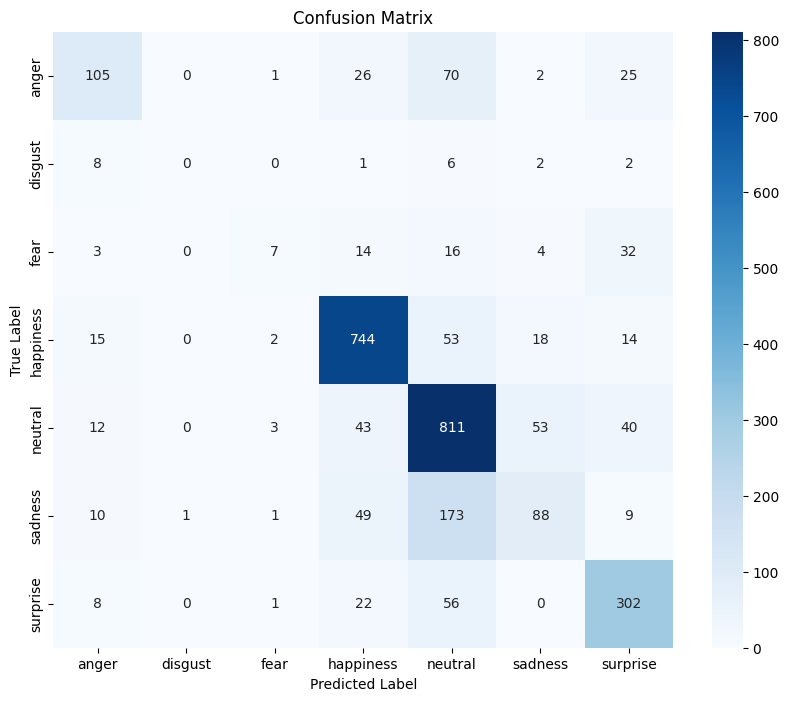

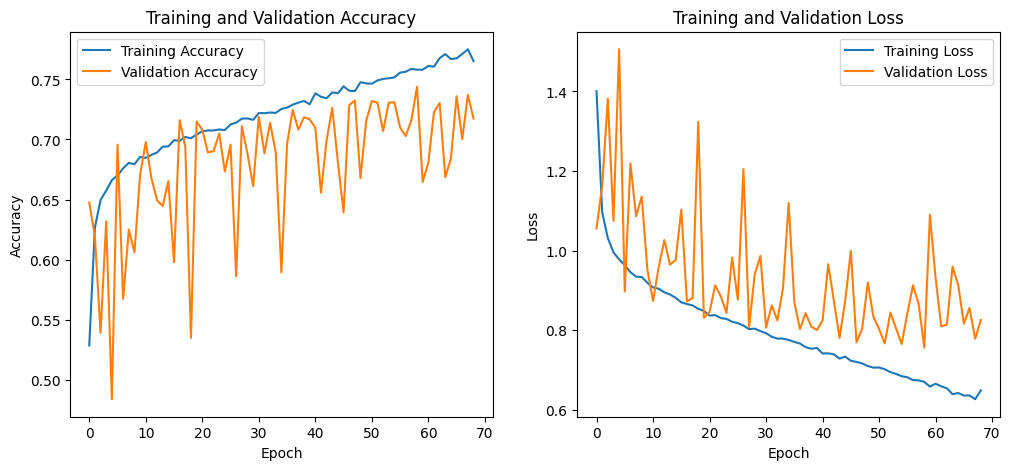

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

class_names = list(label_encoder.classes_)
class_indices = list(range(len(label_encoder.classes_)))

# 1. ‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢‡∏Ñ‡πà‡∏≤‡∏à‡∏≤‡∏Å‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ó‡∏î‡∏™‡∏≠‡∏ö (‡∏à‡∏∞‡πÑ‡∏î‡πâ‡∏ú‡∏•‡∏•‡∏±‡∏û‡∏ò‡πå‡πÄ‡∏õ‡πá‡∏ô‡∏Ñ‡∏ß‡∏≤‡∏°‡∏ô‡πà‡∏≤‡∏à‡∏∞‡πÄ‡∏õ‡πá‡∏ô)
# y_pred_probs = model.predict(X_test_padded) # <-- ‡πÉ‡∏ä‡πâ‡∏ö‡∏£‡∏£‡∏ó‡∏±‡∏î‡∏ô‡∏µ‡πâ‡πÄ‡∏°‡∏∑‡πà‡∏≠‡∏£‡∏±‡∏ô‡∏Å‡∏±‡∏ö‡πÇ‡∏°‡πÄ‡∏î‡∏•‡∏à‡∏£‡∏¥‡∏á
y_pred_probs = model.predict(X_test_input_list)


# 2. ‡πÅ‡∏õ‡∏•‡∏á‡∏Ñ‡πà‡∏≤‡∏Ñ‡∏ß‡∏≤‡∏°‡∏ô‡πà‡∏≤‡∏à‡∏∞‡πÄ‡∏õ‡πá‡∏ô‡πÉ‡∏´‡πâ‡πÄ‡∏õ‡πá‡∏ô‡∏Ñ‡∏•‡∏≤‡∏™‡∏ó‡∏µ‡πà‡∏ñ‡∏π‡∏Å‡∏ó‡∏≥‡∏ô‡∏≤‡∏¢ (‡∏´‡∏≤ index ‡∏ó‡∏µ‡πà‡∏°‡∏µ‡∏Ñ‡πà‡∏≤‡∏™‡∏π‡∏á‡∏™‡∏∏‡∏î)
y_pred = np.argmax(y_pred_probs, axis=1)
print(f"Predicted Classes (y_pred): {y_pred}") # ‡∏ú‡∏•‡∏•‡∏±‡∏û‡∏ò‡πå: [0 1 2 0]

# 3. ‡πÅ‡∏õ‡∏•‡∏á‡∏Ñ‡πà‡∏≤ y_test ‡∏à‡∏≤‡∏Å One-Hot Encoding ‡πÉ‡∏´‡πâ‡πÄ‡∏õ‡πá‡∏ô‡∏Ñ‡∏•‡∏≤‡∏™‡∏ó‡∏µ‡πà‡πÅ‡∏ó‡πâ‡∏à‡∏£‡∏¥‡∏á
# üí° ‡∏´‡∏≤‡∏Å y_test ‡∏Ç‡∏≠‡∏á‡∏Ñ‡∏∏‡∏ì‡πÄ‡∏õ‡πá‡∏ô array 1 ‡∏°‡∏¥‡∏ï‡∏¥‡∏≠‡∏¢‡∏π‡πà‡πÅ‡∏•‡πâ‡∏ß (‡πÄ‡∏ä‡πà‡∏ô [0, 1, 2, 1]) ‡πÑ‡∏°‡πà‡∏à‡∏≥‡πÄ‡∏õ‡πá‡∏ô‡∏ï‡πâ‡∏≠‡∏á‡∏ó‡∏≥‡∏Ç‡∏±‡πâ‡∏ô‡∏ï‡∏≠‡∏ô‡∏ô‡∏µ‡πâ
# ‡πÉ‡∏´‡πâ‡πÉ‡∏ä‡πâ y_true = y_test ‡πÑ‡∏î‡πâ‡πÄ‡∏•‡∏¢
# y_true = np.argmax(y_test_one_hot, axis=1)
y_true = y_test
print(f"True Classes (y_true):      {y_true}") # ‡∏ú‡∏•‡∏•‡∏±‡∏û‡∏ò‡πå: [0 1 2 1]

# 4. ‡∏™‡∏£‡πâ‡∏≤‡∏á‡πÅ‡∏•‡∏∞‡πÅ‡∏™‡∏î‡∏á Classification Report
print("\n============== Classification Report ==============")
report = classification_report(y_true, y_pred, target_names=class_names)
print(report)
print("================================================")

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred, labels=class_indices) # ‡πÉ‡∏ä‡πâ Index ‡∏Ç‡∏≠‡∏á‡∏Ñ‡∏•‡∏≤‡∏™‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names) # ‡πÉ‡∏ä‡πâ‡∏ä‡∏∑‡πà‡∏≠‡∏Ç‡∏≠‡∏á‡∏Ñ‡∏•‡∏≤‡∏™‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# ‡∏û‡∏•‡πá‡∏≠‡∏ï‡∏Å‡∏£‡∏≤‡∏ü Accuracy ‡πÅ‡∏•‡∏∞ Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()